# Exploratory Data Analysis

In [8]:
# Generic python libraries for analysis and data manipulation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

# Plots and figures
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Load the data

In [9]:
df_hi = pd.read_parquet('./data/1_merged_data.parquet')
df_hi.head()

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,...,duplicated,dob_yr,campaign_yr,post_area_code,postcode_area,postcode_area_name,sal_lower,sal_upper,sal_freq,sal_currency
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,...,0,1979.0,2018.0,EH,EH,Edinburgh,18109.00,18109.00,yearly,GBP
1,2.764970e+12,None,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,...,0,1968.0,2018.0,LS,LS,Leeds,16945.00,16945.00,yearly,GBP
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,...,0,1979.0,2017.0,EH,EH,Edinburgh,729.87,729.87,pw,GBP
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,...,0,1965.0,2018.0,EH,EH,Edinburgh,19087.00,19087.00,yearly,GBP
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,...,0,1990.0,2018.0,SN,SN,Swindon,2741.50,2741.50,per month,GBP


In [10]:
# duplicates

In [11]:
print('Duplicated records: ', len(df_hi[df_hi['participant_id'].duplicated(keep=False)]))

Duplicated records:  26


Let's drop all of the duplicated records

In [12]:
df_hi = df_hi.drop_duplicates(subset='participant_id')

In [13]:
df_hi.columns

Index(['participant_id', 'name_title', 'first_name', 'last_name', 'age',
       'postcode', 'marital_status', 'education', 'job_title',
       'occupation_level', 'education_num', 'familiarity_FB', 'view_FB',
       'interested_insurance', 'company_email', 'created_account', 'full_name',
       'dob', 'town', 'paye', 'salary_band', 'years_with_employer',
       'months_with_employer', 'hours_per_week', 'capital_gain',
       'capital_loss', 'new_mortgage', 'sex', 'religion', 'relationship',
       'race', 'native_country', 'workclass', 'demographic_characteristic',
       'duplicated', 'dob_yr', 'campaign_yr', 'post_area_code',
       'postcode_area', 'postcode_area_name', 'sal_lower', 'sal_upper',
       'sal_freq', 'sal_currency'],
      dtype='object')

## matplotlib settings

In [48]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['axes.labelsize'] = 14

mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['legend.title_fontsize'] = 12

mpl.rcParams['axes.spines.right']=False
mpl.rcParams['axes.spines.top']=False

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']



cmap = ListedColormap(['#C1B4AE', '#00864F', '#92140C', '#353238', '#BE5A38'])

In [58]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

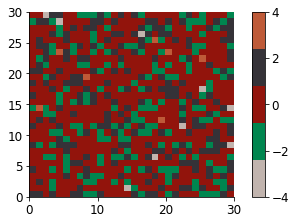

In [59]:
plot_examples([cmap])

## EDA
  
- __`'created_account'`__
- `age`
- `postcode`
- `marital_status`
- `education`
- `job_title`
- `occupation_level`
- `'education_num'`, 
- `'familiarity_FB'`,
- `'view_FB'`,
- `'interested_insurance'`,
- `'company_email'`
  
  
- `years_with_employer`

### Purchased home insurance

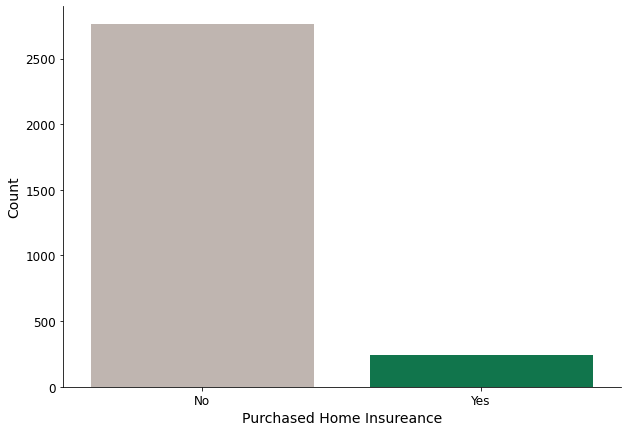

In [61]:
df_churn_count = df_hi['created_account'].value_counts().reset_index()
df_churn_count.columns=['Purchased Home Insureance', 'Count']

# fig, ax = plt.subplots()

sns.barplot(data=df_churn_count, 
            x='Purchased Home Insureance',
            y='Count', 
            palette=cmap.colors,
           );


### Age

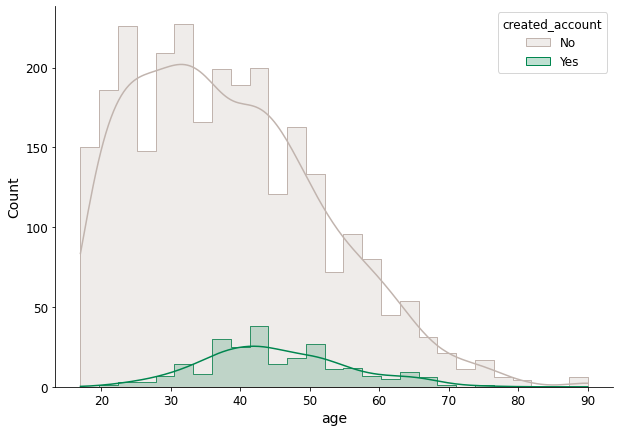

In [63]:
# df_hi[['age', 'created_account']]

# fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(df_hi, x="age", hue='created_account', element='step', kde=True, palette=cmap.colors[:2]);

### Gender

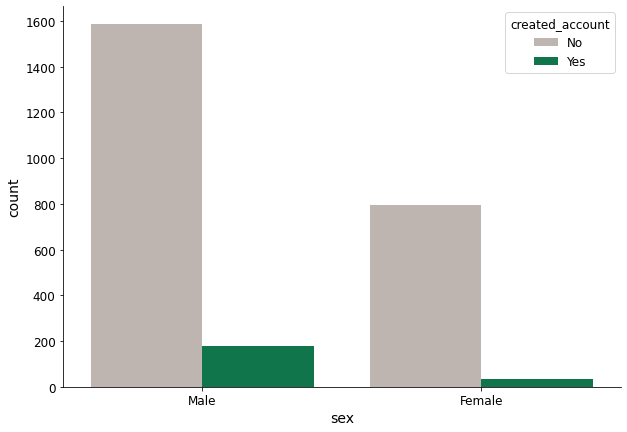

In [64]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(data=df_hi, x='sex', hue='created_account', ax=ax, palette=cmap.colors);

### Postcode
- Exact postcode
- Town

In [65]:
print('town column cardinality: ', len(df_hi['town'].unique()))
print('postcode_area_name column cardinality: ', len(df_hi['postcode_area_name'].unique()))

town column cardinality:  233
postcode_area_name column cardinality:  9


<AxesSubplot:ylabel='Frequency'>

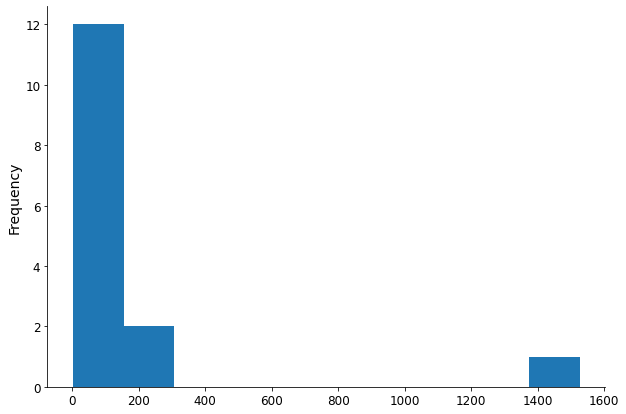

In [66]:
# df_hi_by_town = df_hi.groupby(['town', 'created_account']).count()
# df_hi_by_town['participant_id'].plot(kind='hist')

df_hi_by_town = df_hi.groupby(['postcode_area_name', 'created_account']).count()
df_hi_by_town['participant_id'].plot(kind='hist')

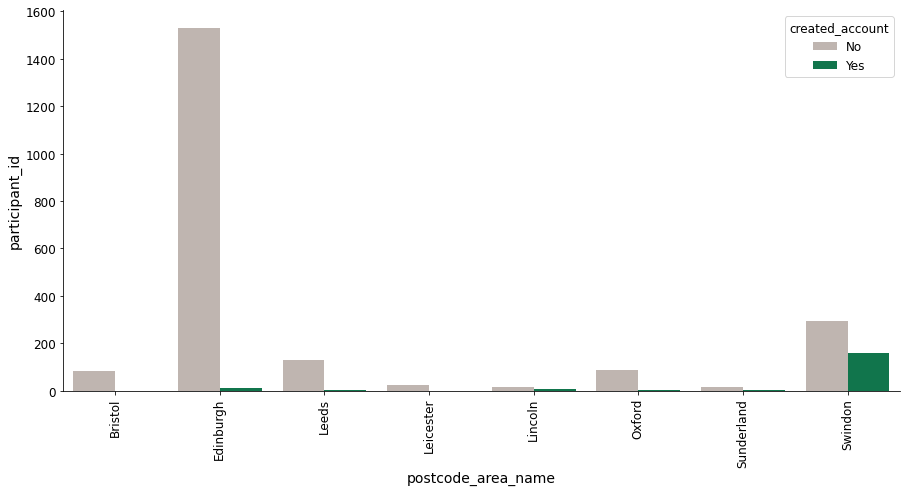

In [67]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(data=df_hi_by_town['participant_id'].reset_index(),
            x='postcode_area_name',
            y='participant_id',
            hue='created_account',
             palette=cmap.colors,
            ax=ax)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

### marital_status

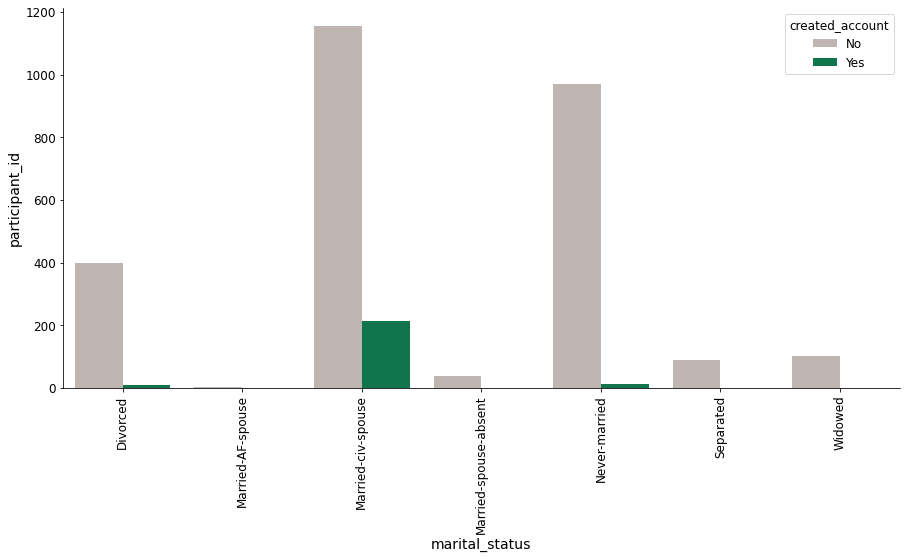

In [68]:
df_hi['marital_status']

df_hi_by_maritalst = df_hi.groupby(['marital_status', 'created_account']).count()
# df_hi_by_maritalst['participant_id'].plot(kind='hist')

fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(data=df_hi_by_maritalst['participant_id'].reset_index(),
            x='marital_status',
            y='participant_id',
            hue='created_account',
             palette=cmap.colors,
            ax=ax)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

### education